#### Exercise 2. Sampling from discrete distributions


In [65]:
import numpy as np
from matplotlib import pyplot as plt


In [66]:
# No. of outcomes
n = 10000
# Probability parameter
p = 0.5
# Obtain samples from geometric distribution 
samples = np.random.geometric(p, n)

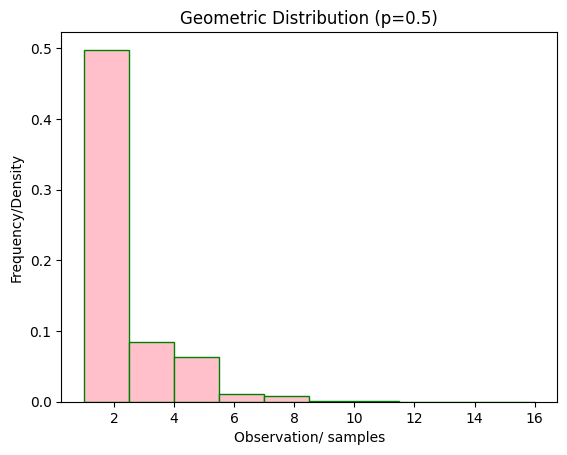

In [67]:
# Define no. of classes
classes = 10

plt.hist(samples, bins=classes, edgecolor='green', color='pink', density=True)
plt.title(f"Geometric Distribution (p={p})")
plt.xlabel('Observation/ samples')
plt.ylabel('Frequency/Density')
plt.show()


2. Simulate the 6 point distribution with

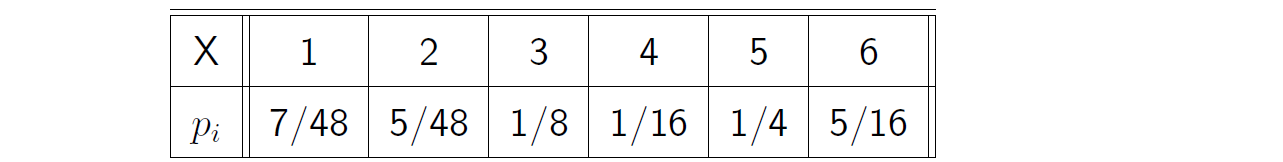

(a) by applying a direct (crude) method

Suppose $X$ can take $k$ distinct values $x_{1} < x_{2} < \ldots < x_{k}$ with 

$$
p_{i} = P(X = x_{i}) \hspace{0.3cm} , \hspace{0.3cm} i = 1,2,\ldots,k
$$

$X$ takes the value $x_{i}$ with probability $p_{i}$. $U$ falls in an interval with length $p_{i}$.

$$
X = x_{i} \hspace{0.3cm} \mathrm{if} \hspace{0.3cm} F(x_{i-1}) < U \leq F(x_{i})
$$

In [72]:
import numpy as np
import matplotlib.pyplot as plt


# Define probability vector and n
p = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])
n = 100

# Compute the CDF and append 0 to the beginning
Fx = np.cumsum(p)
Fx = np.insert(Fx, 0, 0)

# Store results from direct method
results = []

# Sample U and see which interval it falls in
for i in range(n):
    U = np.random.uniform()
    index = np.searchsorted(Fx, U, side='right')
    results.append(index)

results = np.array(results)

# For later use
results_direct = results


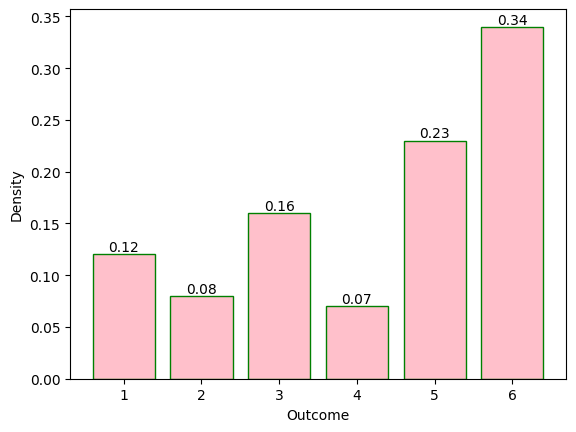

In [73]:
# Histogram 
# Number of outcomes
outcomes = np.arange(1, 7)
    
# Count the frequency of each outcome
frequencies = np.array([np.sum(results == outcome) for outcome in outcomes])
densities = frequencies / n

# Plotting the distribution using a bar graph
bars = plt.bar(outcomes, densities, edgecolor='green', color="pink")
plt.xlabel('Outcome')
plt.ylabel('Density')

# Annotate each bar with its density value
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{densities[i]:.2f}', ha='center', va='bottom')

plt.show()


#### (b) by using the the rejction method


this takes O(1) constant time there's a possibility that it can take very long constant time for very high prob.

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Given discrete probabilities
X = np.array([1, 2, 3, 4, 5, 6])  #holds the six possible discrete outcomes (1 to 6)
p = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16]) #holds their associated probabilities.

# Generate uniform random numbers
n = 100
c = max(p)
k= len(p) # the number of possible outcomes/classes (here, k = 6)

samples = []
 
# Rejection sampling
while len(samples) < n:
    U1 = np.random.uniform()
    U2 = np.random.uniform()

    I = int ( np.floor( (k * U1) ) ) # zero-based indexing / # Ensure index is in range 0 to k-1
    if U2 <= ( p[I] / c ):
        samples.append(X[I])


results = np.array(samples)
samples_rejected = results



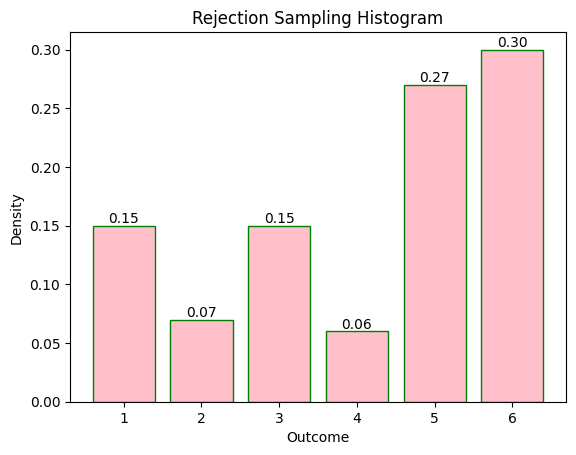

In [76]:
# Plot histogram
# Number of outcomes
outcomes = np.arange(1, 7)
    
# Count the frequency of each outcome
frequencies = np.array([np.sum(results == outcome) for outcome in outcomes])
densities = frequencies / n

# Plotting the distribution using a bar graph
bars = plt.bar(outcomes, densities, edgecolor='green', color='pink')

plt.title("Rejection Sampling Histogram")
plt.xlabel('Outcome')
plt.ylabel('Density')

# Annotate each bar with its density value
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{densities[i]:.2f}', ha='center', va='bottom')

plt.show()

### (c) by using the Alias method

In [77]:
def alias_setup(probs):
    n = len(probs)
    prob = np.zeros(n)
    alias = np.zeros(n, dtype=int)
    scaled_probs = np.array(probs) * n
    small = []
    large = []
    
    for i, p in enumerate(scaled_probs):
        if p < 1.0:
            small.append(i)
        else:
            large.append(i)
    
    while small and large:
        small_idx = small.pop()
        large_idx = large.pop()
        
        prob[small_idx] = scaled_probs[small_idx]
        alias[small_idx] = large_idx
        
        scaled_probs[large_idx] = (scaled_probs[large_idx] + scaled_probs[small_idx]) - 1.0
        if scaled_probs[large_idx] < 1.0:
            small.append(large_idx)
        else:
            large.append(large_idx)
    
    for remaining in small + large:
        prob[remaining] = 1.0
    
    return prob, alias

def alias_draw(prob, alias):
    n = len(prob)
    i = np.random.randint(n)
    return i if np.random.rand() < prob[i] else alias[i]


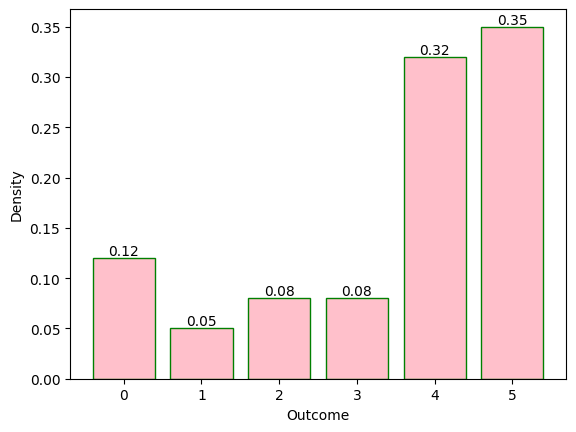

In [80]:
# Example usage
probs = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]  # Example probabilities
prob, alias = alias_setup(probs)

# Generate samples
n = 100
samples = [alias_draw(prob, alias) for _ in range(n)]

# Count occurrences of each outcome
unique, counts = np.unique(samples, return_counts=True)
densities = counts / n

# For later use
results_alias = counts
results_alias = np.array(results_alias)

# Plot the results as a bar graph
bars = plt.bar(unique, densities, edgecolor='green', color='pink')
plt.xlabel('Outcome')
plt.ylabel('Density')

# Annotate each bar with its density value
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{densities[i]:.2f}', ha='center', va='bottom')

plt.show()


O(1) running time , can take a long time to set up a table.

#### $\Chi^2 - Test$

We can use a $\chi^2$-test and obtain a test statistic which can then be compared with a $\chi^2$ distribution with $df = n_{\mathrm{classes}} - 1$ degrees of freedom. 

$$
T = \sum^{n_{\mathrm{classes}}}_{i=1} \frac{ ( n_{\mathrm{observed},i} - n_{\mathrm{expected},i} )^2 }{ n_{\mathrm{expected},i} }
$$

We make the following observations:
- If $\chi^2_{observed}>\chi^2_{critical}$ we can reject the null hypothesis that the two samples come from the same distribution.
- The p-value in the context of a $\chi^2$ test represents the probability of observing a $\chi^2$ statistic as extreme as, or more extreme than, the observed value under the null hypothesis.


In [81]:
from scipy.stats import chi2

#### $\chi^2$-test: Direct method

In [82]:
# Obtain results - Code copied from previous exercise
outcome = np.arange(1, 7)
frequencies = np.array([np.sum(results_direct == outcome) for outcome in outcomes])
densities = frequencies / n

# No. of classes
classes = len(p)

# Compute expected probabilities
expected = n * p

# The frequencies vector is the observed
observed = frequencies

# Compute the test statistic
T = np.sum( ( observed - expected )**2 / expected )
print("The observed test statistic is:", T)

# estimated parameters
m = 0

# Degrees of freedom
df = classes - 1 - m

# Significance level
alpha = 0.05

# Calculate critical value
chi_squared = chi2.ppf(1 - alpha, df)
print("The critical value is:", chi_squared)

# Calculate the p-value under the observed test statistic
p_value = chi2.sf(T, df)
print("The p-value is:", p_value)


The observed test statistic is: 2.490285714285715
The critical value is: 11.070497693516351
The p-value is: 0.7779573460265764


#### $\chi^2$-test: Rejection method

In [84]:
# Obtain results - Code copied from previous exercise
outcomes = np.arange(1, 7)
frequencies = np.array([np.sum(samples_rejected == outcome) for outcome in outcomes])
densities = frequencies / n

# No. of classes
classes = len(p)

# Compute expected probabilities
expected = n * p

# The frequencies vector is the observed
observed = frequencies

# Compute the test statistic
T = np.sum( ( observed - expected )**2 / expected )
print("The observed test statistic is:", T)

# Degrees of freedom
df = classes - 1

# Significance level
alpha = 0.05

# Calculate critical value
chi_squared = chi2.ppf(1 - alpha, df)
print("The critical value is:", chi_squared)

# Calculate the p-value under the observed test statistic
p_value = chi2.sf(T, df)
print("The p-value is:", p_value)


The observed test statistic is: 1.8525714285714292
The critical value is: 11.070497693516351
The p-value is: 0.8691452869971075


#### $\chi^2$-test: Alias method

In [85]:
# Obtain results - Code copied from previous exercise
densities = results_alias / n

# No. of classes
classes = len(p)

# Compute expected probabilities
expected = n * p

# The results_alias vector is the observed
observed = results_alias

# Compute the test statistic
T = np.sum( ( observed - expected )**2 / expected )
print("The observed test statistic is:", T)

# Degrees of freedom
df = classes - 1

# Significance level
alpha = 0.05

# Calculate critical value
chi_squared = chi2.ppf(1 - alpha, df)
print("The critical value is:", chi_squared)

# Calculate the p-value under the observed test statistic
p_value = chi2.sf(T, df)
print("The p-value is:", p_value)


The observed test statistic is: 7.794285714285715
The critical value is: 11.070497693516351
The p-value is: 0.16794330271900948


Excercise 3: Continuous Random Variables

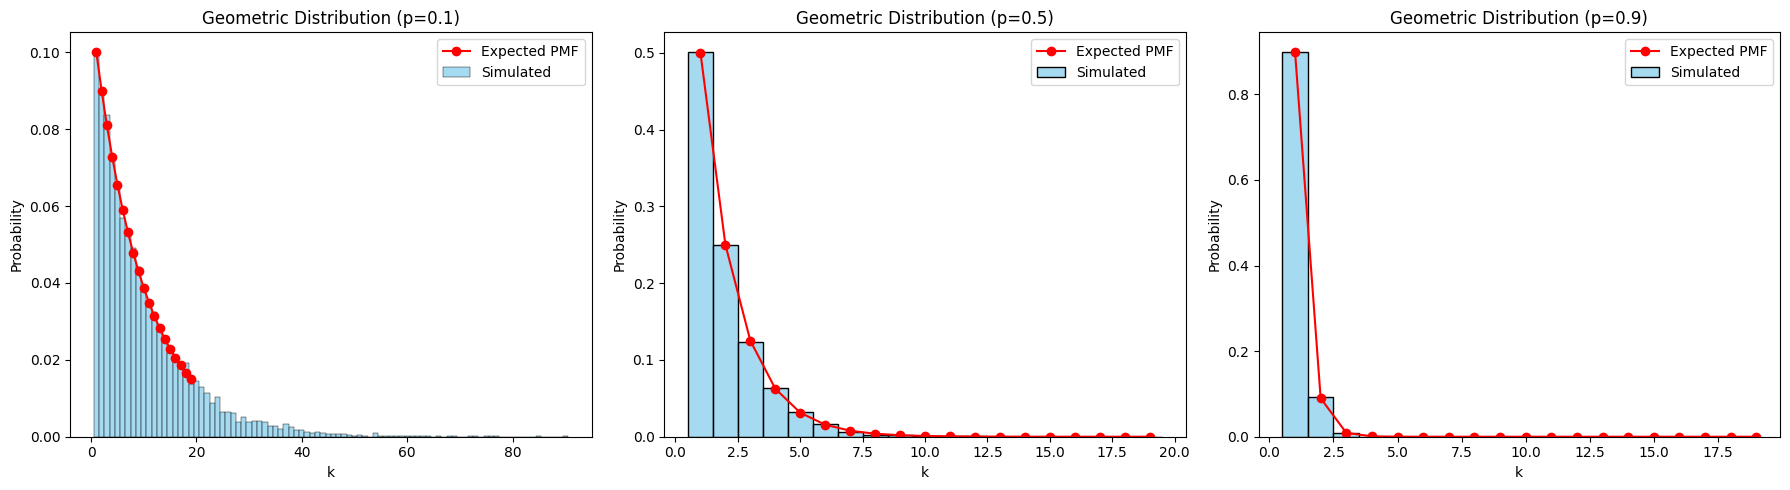

<Figure size 640x480 with 0 Axes>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import geom

# Set probability values to test
p_values = [0.1, 0.5, 0.9]
n_samples = 10000

# Initialize a plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Simulate and plot for each p
for i, p in enumerate(p_values):
    samples = np.random.geometric(p, size=n_samples)

    # Compute expected probabilities for comparison
    x = np.arange(1, 20)
    expected_probs = geom.pmf(x, p)

    # Plot histogram
    sns.histplot(samples, stat="probability", bins=np.arange(1, 22)-0.5, discrete=True, ax=axes[i], color='skyblue', label='Simulated')
    axes[i].plot(x, expected_probs, 'ro-', label='Expected PMF')
    axes[i].set_title(f"Geometric Distribution (p={p})")
    axes[i].set_xlabel("k")
    axes[i].set_ylabel("Probability")
    axes[i].legend()

plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()
